In [1]:
# Beraat BUZ
# 150160002
import numpy as np
import cv2
from matplotlib import pyplot as plt
from itertools import chain
import wave
from  scipy.io.wavfile import write
import zipfile
from scipy.signal import butter, lfilter
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz

In [2]:
#Question 1

#Read
image1 = cv2.imread('lena_grayscale.jpg' , cv2.IMREAD_GRAYSCALE) # do the 2D fourier transform
fft_image1 = np.fft.fft2(image1)
magnitude1=np.abs(fft_image1)
phase1=np.angle(fft_image1)


image2 = cv2.imread('fabric_grayscale.jpg' , cv2.IMREAD_GRAYSCALE) 
fft_image2 = np.fft.fft2(image2)
magnitude2=np.abs(fft_image2)
phase2=np.angle(fft_image2)

#To Obtain original images we have to multiply them in the Fourier domain, and take the real values of inverse fft.
original1=np.multiply(magnitude1, np.exp(1j*phase1))
original1 = np.real(np.fft.ifft2(original1))
cv2.imshow( 'Original lena Window' , original1.astype(np.uint8))
cv2.waitKey ()

original2=np.multiply(magnitude2, np.exp(1j*phase2))
original2 = np.real(np.fft.ifft2(original2))
cv2.imshow( 'Original fabric Window' , original2.astype(np.uint8))
cv2.waitKey ()

#Obtain new images
combined1 = np.multiply(magnitude1, np.exp(1j*phase2))
imgCombined1 = np.real(np.fft.ifft2(combined1))
imgCombined1 = ((imgCombined1 - np.amin(imgCombined1))/(np.amax(imgCombined1)-np.amin(imgCombined1)))*255

combined2 = np.multiply(magnitude2, np.exp(1j*phase1))
imgCombined2 = np.real(np.fft.ifft2(combined2))
imgCombined2 = ((imgCombined2 - np.amin(imgCombined2))/(np.amax(imgCombined2)-np.amin(imgCombined2)))*255

#Show
cv2.imshow( 'First Window' , imgCombined1.astype(np.uint8))
cv2.waitKey ()
cv2.imwrite ('combined1.jpg' , imgCombined1 )

cv2.imshow( 'Second Window' , imgCombined2.astype(np.uint8))
cv2.waitKey ()
cv2.imwrite ('combined2.jpg' , imgCombined2 )

#Since phase contains the information about the locations of features of images, and Magnitude changes the shape of the feature,
#when we multiply them in the Fourier domain, we get an image with different locations and shapes.

True

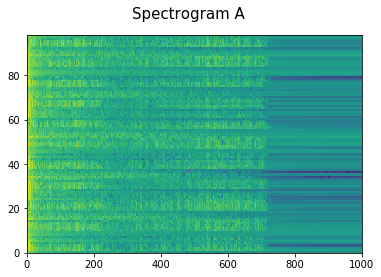

In [3]:
#Question 2
#Read
spectrogram = np.load('spectrogram.npy')
phases = np.load('phases.npy')
#Combine

fig, ax = plt.subplots()
fig.suptitle('Spectrogram A', fontsize=15)
ax.set_yscale('linear')
ax.pcolormesh(spectrogram)
plt.show()

In [4]:
#Get Audio
spectrogram = np.append(spectrogram, spectrogram, 1) #To be equal to size
spectrogram=10**(spectrogram/10)-0.00001
combined = np.multiply(spectrogram, np.exp(1j*phases)) #combine with phases
audio = np.real(np.fft.ifft(combined)) #take inverse fft
audio=list(chain.from_iterable(audio))
audio = np.array(audio, dtype=np.float32)  # The audio is correct when I write and control
#write('temp.wav', 44100, audio)S

In [5]:
def plot_hann(window,audio,Sp): #window size = step size
    result= [[0 for x in range(window)] for y in range(int(len(audio)/window))]  #store in result array
    increment=0
    for j in range(0,len(audio),window):
        for i in range(window):
            if(j+i<len(audio)):
                result[increment][i]=audio[j+i]*(0.5-0.5*np.cos(2*np.pi*(i+1)/(window+1))) #hann window
            else:
                result[increment][i]=0
        increment=increment+1
    result=abs(np.fft.fft(result))
    result=10*np.log10(result+0.00001)   #smooth
    fig, ax = plt.subplots()
    fig.suptitle('Spectrogram '+Sp, fontsize=15)
    ax.set_yscale('linear')
    ax.pcolormesh(result)
    plt.xlim(0,int(window/2)) #I plot half of the spectrograms
    plt.show()

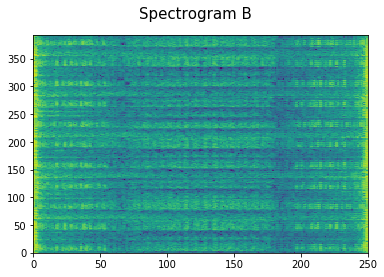

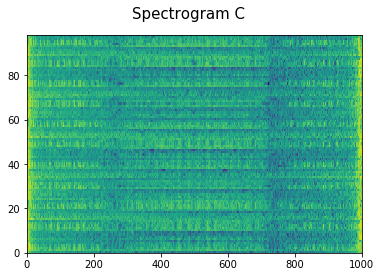

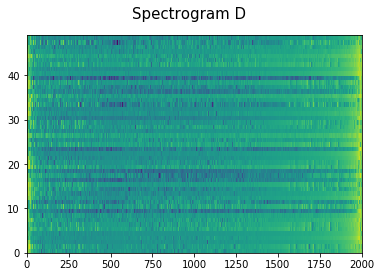

In [6]:
plot_hann(500,audio,'B')
plot_hann(2000,audio,'C')
plot_hann(4000,audio,'D')
#The time-frequency resolution of the spectrogram is dependent for chosen window size. 
#A larger size will result in a higher spectral, but lower temporal resolution,
#A smaller size will result in a lower spectral, but higher temporal resolution. 
#Therefore Spectrogram B has higher temporal resolution, whereas Spectrogram D has lower temporal resolution

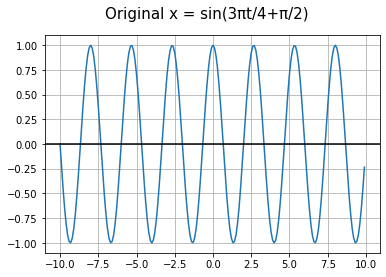

In [7]:
#Question 3
#Plot original signals
time = np.arange(-10, 10, 0.1);
signal=np.sin((3*np.pi*time/4)+(np.pi/2))
fig, ax = plt.subplots()
fig.suptitle("Original x = sin(3πt/4+π/2)", fontsize=15)
plt.plot(time, signal)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.show()

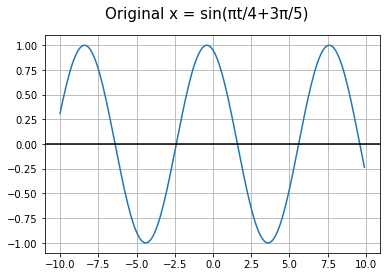

In [8]:
#Plot original signals
signal=np.sin((np.pi*time/4)+(3*np.pi/5))
fig, ax = plt.subplots()
fig.suptitle("Original x = sin(πt/4+3π/5)", fontsize=15)
plt.plot(time, signal)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.show()

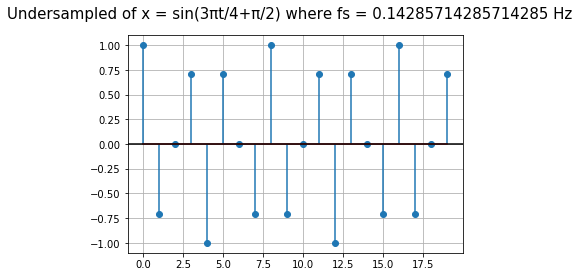

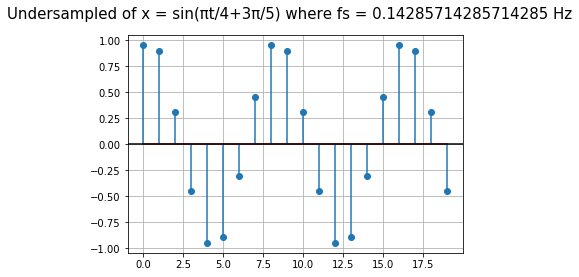

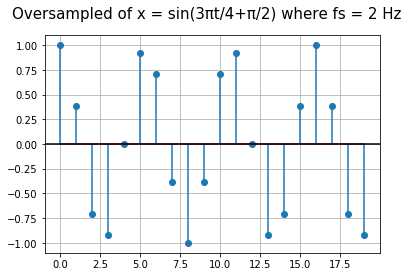

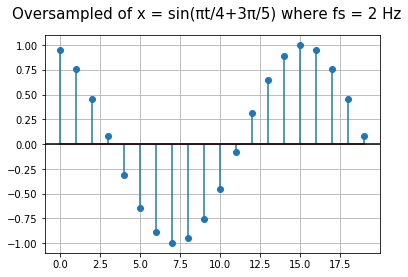

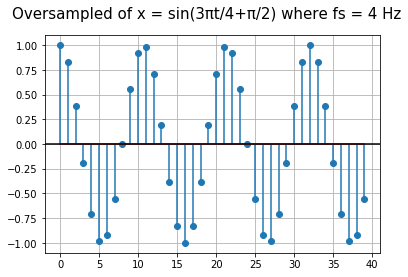

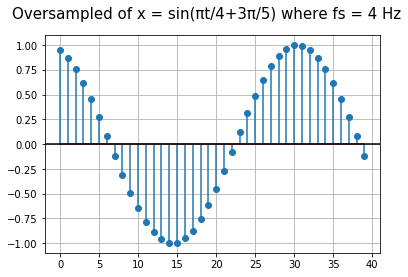

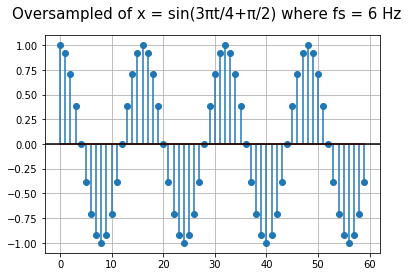

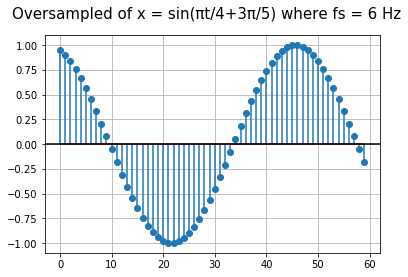

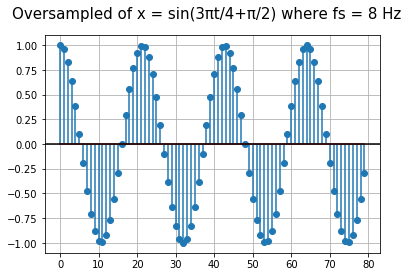

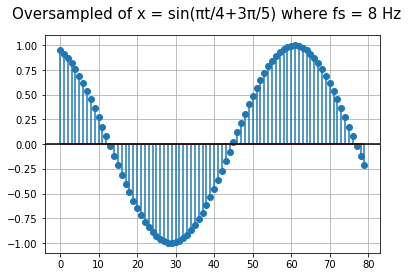

In [9]:
#Sampling these two signals using 5 different sampling frequencies and Showing undersampled and oversampled examples

#According to Sampling Theorem
#Sampling Rate > 2(Highest Frequency)
def sampling(n ,fs,first_or_second,Message):
    Ts=1/fs
    if(first_or_second==1):
        signal=np.sin((3*np.pi*n*Ts/4)+(np.pi/2)) # f = 3/8 hertz ;  Sampling rate must be greater than 3/4 hertz
    else:
        signal=np.sin((np.pi*n*Ts/4)+(3*np.pi/5)) # f = 1/8 hertz ;  Sampling rate must be greater than 1/4 hertz
    fig, ax = plt.subplots()
    fig.suptitle(Message+" where fs = "+str(fs)+" Hz", fontsize=15)
    plt.stem(n, signal,use_line_collection=True);
    plt.plot()
    plt.grid(True, which='both')
    plt.axhline(y=0, color='k')
    plt.show()
# Therefore; minimum sampling rates are 1/4 and 3/4.

sampling(np.arange(20),1/7,1,"Undersampled of x = sin(3πt/4+π/2)")
sampling(np.arange(20),1/7,2,"Undersampled of x = sin(πt/4+3π/5)")
for i in range(2,9,2):
    sampling(np.arange(i*10),i,1,"Oversampled of x = sin(3πt/4+π/2)")
    sampling(np.arange(i*10),i,2,"Oversampled of x = sin(πt/4+3π/5)")
#For the highest frequencies samples are more relatable to the original signals.

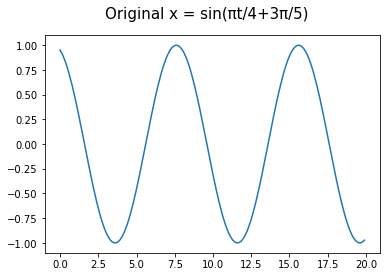

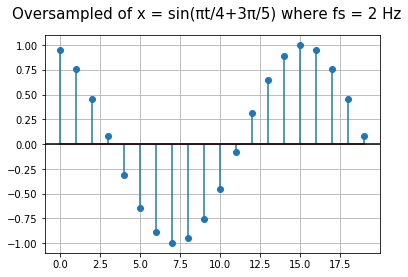

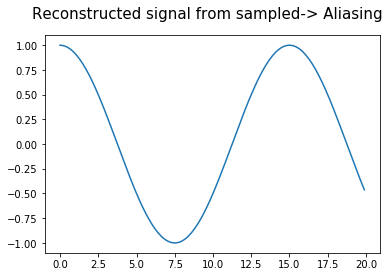

In [10]:
#Illustrates the phenomenon of aliasing
#I observe the sampling plots to find the period.
fig, ax = plt.subplots()
fig.suptitle("Original x = sin(πt/4+3π/5)", fontsize=15)
time = np.arange(0, 20, 0.1);
signal=np.sin((np.pi*time/4)+(3*np.pi/5))
plt.plot(time, signal)
plt.show()
sampling(np.arange(2*10),2,2,"Oversampled of x = sin(πt/4+3π/5)")
fig, ax = plt.subplots()
signal=np.cos((2*np.pi*time/15))
fig.suptitle("Reconstructed signal from sampled-> Aliasing", fontsize=15)
plt.plot(time, signal)
plt.show()

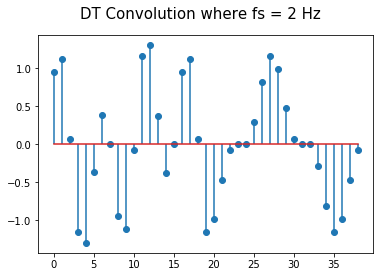

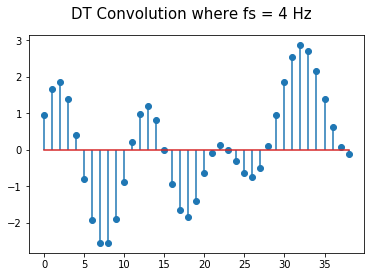

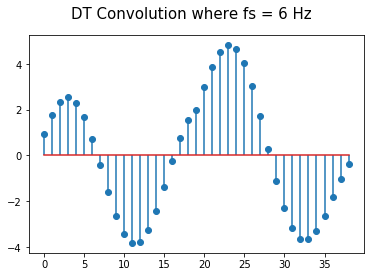

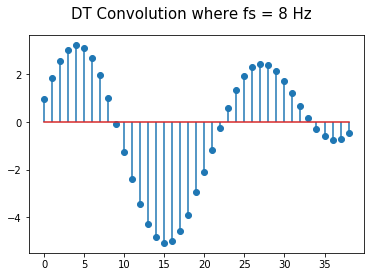

In [11]:
def convolution(signal1,signal2,Message): #Convolution Function
    answer=[]
    for i in range(len(signal1)+len(signal2)-1):
        total=0
        for j in range(len(signal1)):
            if(i-j>=0 and i-j<len(signal2)):
                total=total+signal1[j]*signal2[i-j]
        answer.append(total)
    fig, ax = plt.subplots()
    fig.suptitle("DT Convolution where fs = "+str(Message)+" Hz", fontsize=15)
    plt.stem(answer,use_line_collection=True)
    plt.show()
        
        
for i in range(2,9,2):
    signal1=np.sin((3*np.pi*np.arange(20)*(1/i)*(1/4))+(np.pi/2)) #I have chosen the arange was 20, it can be changed.
    signal2=np.sin((np.pi*np.arange(20)*(1/i)*(1/4))+(3*np.pi/5))
    convolution(signal1,signal2,i)       

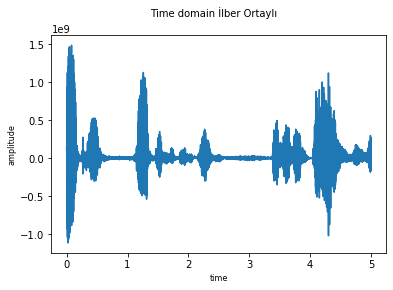

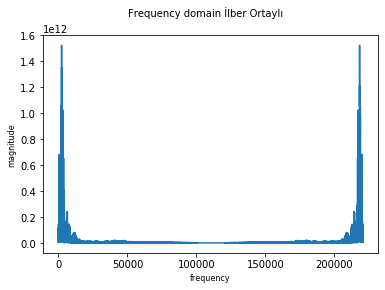

In [12]:
#Question 4

#Read the İlber Ortaylı's sound file and plot its graphics separately in time and frequency domain
spf = wave.open("ilber_ortaylı.wav", "r")
signal1 = spf.readframes(-1)
signal1 = np.frombuffer(signal1, dtype=np.dtype(int))

fs = spf.getframerate()
Time = np.linspace(0, len(signal1) / fs, num=len(signal1))
fig, ax = plt.subplots()
fig.suptitle('Time domain İlber Ortaylı', fontsize=10)
plt.xlabel('time', fontsize=8)
plt.ylabel('amplitude', fontsize=8)
plt.plot(Time,signal1)
fig, ax = plt.subplots()
fig.suptitle('Frequency domain İlber Ortaylı', fontsize=10)
plt.xlabel('frequency', fontsize=8)
plt.ylabel('magnitude', fontsize=8)
plt.plot(abs(np.fft.fft(signal1)))


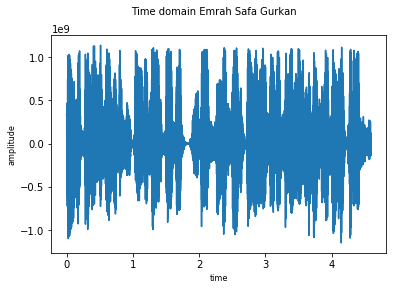

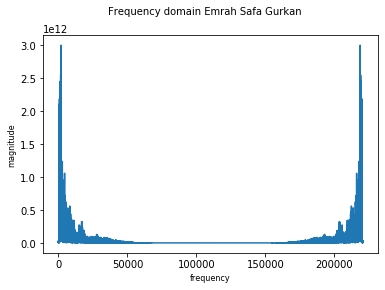

In [13]:
#Read the Emrah Safa Gurkan's sound file and plot its graphics separately in time and frequency domain
spf = wave.open("esg.wav", "r")
signal2 = spf.readframes(-1)
signal2 = np.frombuffer(signal2, dtype=np.dtype(int))

fs = spf.getframerate()
Time1 = np.linspace(0, len(signal2) / fs, num=len(signal2))
fig, ax = plt.subplots()
fig.suptitle('Time domain Emrah Safa Gurkan', fontsize=10)
plt.xlabel('time', fontsize=8)
plt.ylabel('amplitude', fontsize=8)
plt.plot(Time1,signal2)
fig, ax = plt.subplots()
fig.suptitle('Frequency domain Emrah Safa Gurkan', fontsize=10)
plt.xlabel('frequency', fontsize=8)
plt.ylabel('magnitude', fontsize=8)
plt.plot(abs(np.fft.fft(signal2)))

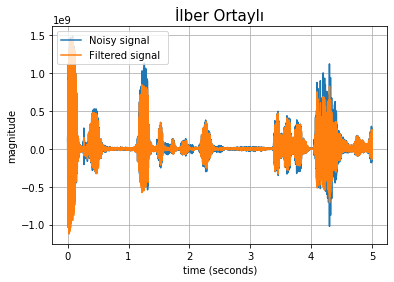

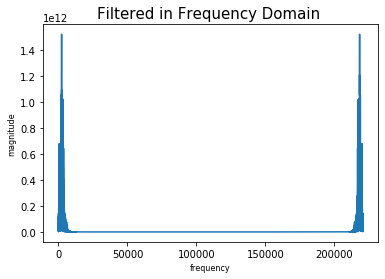

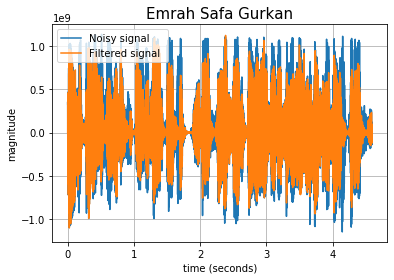

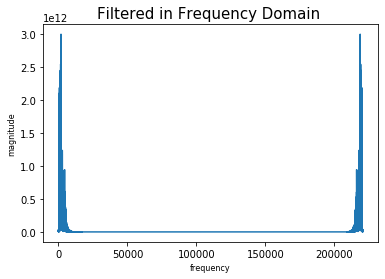

In [14]:

#Filter the sound signals with a lowpass filter to obtain bandlimited signals

def butter_lowpass(lowcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    b, a = butter(order, low, btype='lowpass')
    return b, a


def butter_lowpass_filter(data, lowcut, fs, order=5):
    b, a = butter_lowpass(lowcut, fs, order=order)
    y = lfilter(b, a, data)
    return y


# Sample rate and desired cutoff frequencies (in Hz).
fs = 220501.0 #our real frequency
lowcut = 5000.0

plt.figure(1)
plt.clf()
plt.title('İlber Ortaylı', fontsize=15)
plt.plot(Time, signal1, label='Noisy signal')
y1 = butter_lowpass_filter(signal1, lowcut, fs, order=6)
plt.plot(Time, y1, label='Filtered signal ')
plt.ylabel('magnitude')
plt.xlabel('time (seconds)')
plt.grid(True)
plt.axis('tight')
plt.legend(loc='upper left')

plt.figure(2)
plt.clf()
plt.title('Filtered in Frequency Domain ' , fontsize=15)
plt.xlabel('frequency', fontsize=8)
plt.ylabel('magnitude', fontsize=8)
plt.plot(abs(np.fft.fft(y1)))

plt.figure(3)
plt.clf()
plt.title('Emrah Safa Gurkan', fontsize=15)
plt.plot(Time1, signal2, label='Noisy signal')
y2 = butter_lowpass_filter(signal2, lowcut, fs, order=6)
plt.plot(Time1, y2, label='Filtered signal ')
plt.ylabel('magnitude')
plt.xlabel('time (seconds)')
plt.grid(True)
plt.axis('tight')
plt.legend(loc='upper left')

plt.figure(4)
plt.clf()
plt.title('Filtered in Frequency Domain ' , fontsize=15)
plt.xlabel('frequency', fontsize=8)
plt.ylabel('magnitude', fontsize=8)
plt.plot(abs(np.fft.fft(y2)))
plt.show()
#We have to use bandlimited signals for modulation to distinguish them, if we don't use it ,we can have aliasing distortion.


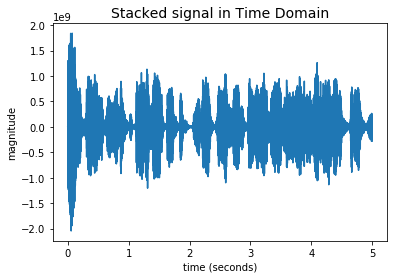

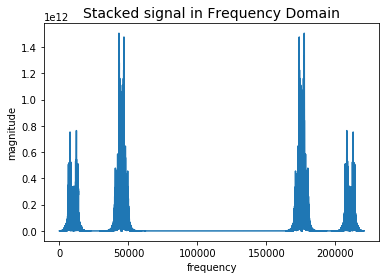

In [15]:
t = np.linspace(0, 1, 220501)
c1=np.cos(2*np.pi*10000*t) #fc1=10000Hz
c2=np.cos(2*np.pi*45000*t) #fc2=45000Hz
# Need |fc1-fc2|>2*fb
# Our fb is 5000
#Therefore; I choose 10000 and 45000

out=c1*y1+c2*y2 #output
plt.figure(1)
plt.title('Stacked signal in Time Domain', fontsize=14)
plt.ylabel('magnitude')
plt.xlabel('time (seconds)')
plt.plot(Time, out)
plt.figure(2)
plt.title('Stacked signal in Frequency Domain', fontsize=14)
plt.ylabel('magnitude')
plt.xlabel('frequency')
plt.plot(abs(np.fft.fft(out)))

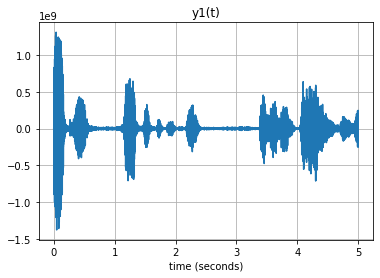

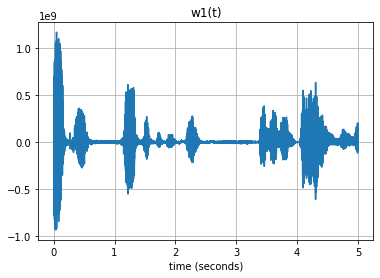

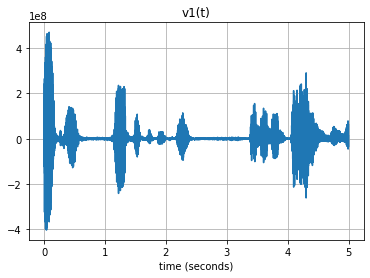

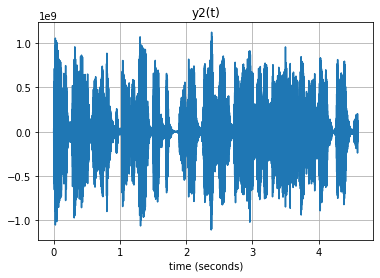

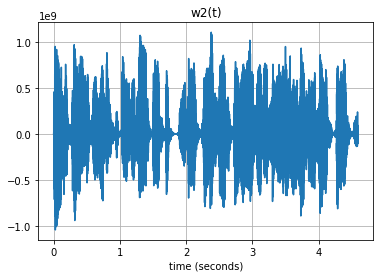

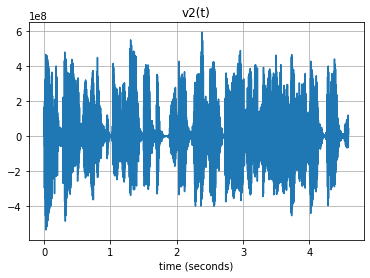

In [16]:
#Plot the graphics of the results at each step of the diagram.

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y
fs=220501.0

#low cut and high cut must be fc1-fb and fc1+fb ; therefore I choose below numbers

lowcut = 5000.0 
highcut = 15000.0


o1= butter_bandpass_filter(out, lowcut, highcut, fs, order=6)
plt.figure(1)
plt.clf()
plt.plot(Time, o1)
plt.title("y1(t)")
plt.xlabel('time (seconds)')
plt.grid(True)
plt.axis('tight')

o1=o1*c1
plt.figure(2)
plt.clf()
plt.plot(Time, o1)
plt.title("w1(t)")
plt.xlabel('time (seconds)')
plt.grid(True)
plt.axis('tight')


o1= butter_lowpass_filter(o1, 5000, fs, order=6)
plt.figure(3)
plt.clf()
plt.plot(Time, o1)
plt.title("v1(t)")
plt.xlabel('time (seconds)')
plt.grid(True)
plt.axis('tight')

#low cut and high cut must be fc2-fb and fc2+fb ; therefore I choose below numbers

lowcut = 40000.0
highcut = 50000.0


o2= butter_bandpass_filter(out, lowcut, highcut, fs, order=6)
plt.figure(4)
plt.clf()
plt.plot(Time1, o2)
plt.title("y2(t)")
plt.xlabel('time (seconds)')
plt.grid(True)
plt.axis('tight')

o2=o2*c2
plt.figure(5)
plt.clf()
plt.plot(Time1, o2)
plt.title("w2(t)")
plt.xlabel('time (seconds)')
plt.grid(True)
plt.axis('tight')

o2= butter_lowpass_filter(o2, 5000, fs, order=6)
plt.figure(6)
plt.clf()
plt.plot(Time1, o2)
plt.title("v2(t)")
plt.xlabel('time (seconds)')
plt.grid(True)
plt.axis('tight')

#We allocate a frequency band to each signal, to get back to original signal we need to these filters. 
plt.show()

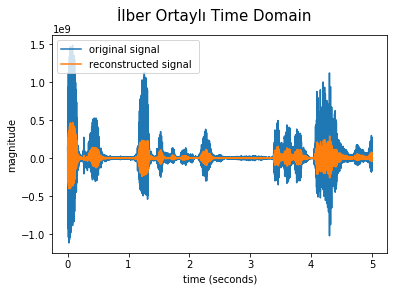

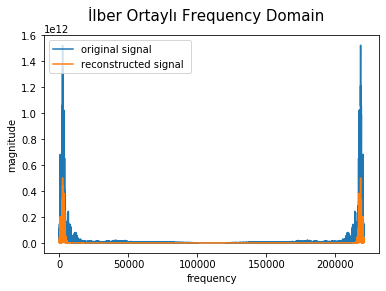

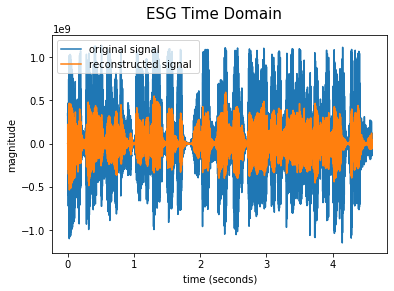

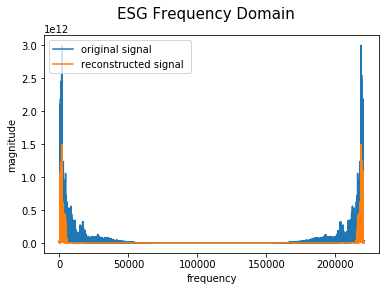

In [17]:
#Compare reconstructed signals with original ones using graphs in frequency and time domain
fig, ax = plt.subplots()
fig.suptitle('İlber Ortaylı Time Domain', fontsize=15)
plt.plot(Time,signal1, label='original signal ')
plt.plot(Time,o1, label='reconstructed signal ')
plt.ylabel('magnitude')
plt.xlabel('time (seconds)')
plt.legend(loc='upper left')

fig, ax = plt.subplots()
fig.suptitle('İlber Ortaylı Frequency Domain', fontsize=15)
plt.plot(abs(np.fft.fft(signal1)),label='original signal ')
plt.plot(abs(np.fft.fft(o1)), label='reconstructed signal ')
plt.ylabel('magnitude')
plt.xlabel('frequency')
plt.legend(loc='upper left')

fig, ax = plt.subplots()
fig.suptitle('ESG Time Domain', fontsize=15)
plt.plot(Time1,signal2, label='original signal ')
plt.plot(Time1,o2, label='reconstructed signal ')
plt.ylabel('magnitude')
plt.xlabel('time (seconds)')
plt.legend(loc='upper left')

fig, ax = plt.subplots()
fig.suptitle('ESG Frequency Domain', fontsize=15)
plt.plot(abs(np.fft.fft(signal2)),label='original signal ')
plt.plot(abs(np.fft.fft(o2)), label='reconstructed signal ')
plt.ylabel('magnitude')
plt.xlabel('frequency')
plt.legend(loc='upper left')

In [18]:
#A function that saves the reconstructed audio file
def write_sound(reconstructed,name):
    sig=reconstructed
    m = np.max(np.abs(sig)) #needed for write operation
    sigf32 = (sig/m).astype(np.float32)
    write(name, 44100, sigf32)

write_sound(o1,'new_ilb_sound.wav')
write_sound(o2,'new_esg_sound.wav')

#The reconstructed audios are clear, but they are like a hoarse voice.

In [19]:
#When I change the carrier signals with overlapping carrier frequencies and listen reconstructed sound signal,
#I observe that the sound is like a robotic sound and both of them can be heard.